In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils

In [ ]:
lstr_input_image_path = "/content/drive/MyDrive/sample_images/sample_doc2.jpg"
larr_doc_img = cv2.imread(lstr_input_image_path)
ratio = larr_doc_img.shape[0] / 500.0
larr_og_doc_img = larr_doc_img.copy()
larr_doc_img_resized = imutils.resize(larr_doc_img, height = 500)

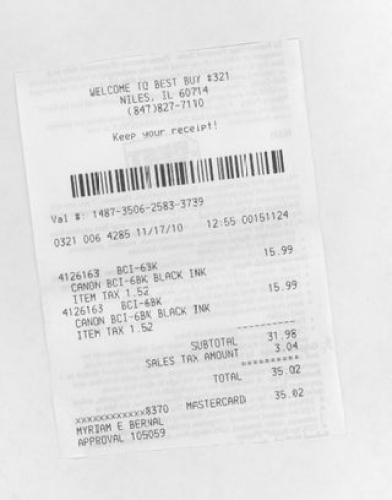

In [ ]:
cv2_imshow(larr_doc_img_resized)

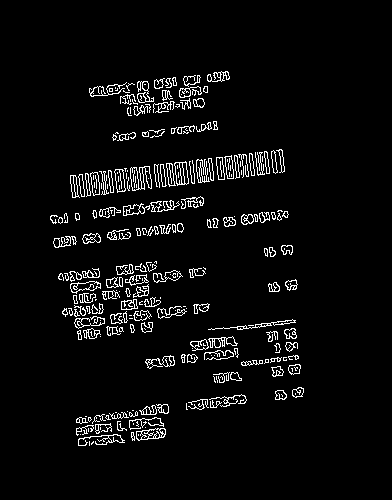

In [ ]:
larr_doc_img_gray = cv2.cvtColor(larr_doc_img_resized, cv2.COLOR_BGR2GRAY)
larr_doc_img_gray_blured = cv2.GaussianBlur(larr_doc_img_gray, (5, 5), 0)
larr_doc_edged = cv2.Canny(larr_doc_img_gray_blured, 0, 70)
cv2_imshow(larr_doc_edged)

485


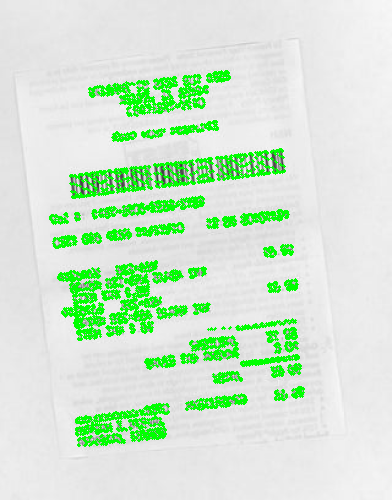

[300.0, 255.0, 254.5, 214.5, 187.0, 179.5, 173.5, 173.0, 158.5, 156.5, 154.5, 152.0, 146.5, 146.5, 143.0, 141.0, 139.0, 135.0, 135.0, 134.5, 132.0, 128.5, 128.5, 125.5, 124.0, 123.0, 123.0, 117.0, 116.5, 106.0, 105.5, 104.5, 103.0, 101.0, 100.0, 98.0, 98.0, 96.5, 94.5, 94.0, 92.5, 92.0, 90.0, 88.0, 84.0, 83.5, 83.0, 82.5, 81.0, 81.0, 80.0, 79.5, 79.5, 79.0, 78.0, 77.5, 77.5, 77.5, 77.0, 77.0, 76.5, 76.0, 76.0, 75.0, 74.5, 74.0, 72.5, 72.5, 72.0, 72.0, 71.5, 71.0, 71.0, 69.5, 69.5, 67.0, 67.0, 66.5, 66.5, 65.5, 64.5, 64.5, 64.0, 63.5, 63.5, 63.0, 62.5, 62.5, 62.5, 62.5, 61.5, 61.0, 61.0, 60.5, 60.5, 60.0, 59.5, 59.0, 58.5, 58.0, 57.5, 57.5, 57.5, 57.0, 56.0, 56.0, 55.5, 55.5, 55.5, 55.5, 55.0, 54.5, 52.5, 52.0, 52.0, 51.5, 51.0, 50.5, 49.5, 49.5, 46.0, 45.5, 44.5, 44.5, 44.0, 44.0, 43.5, 43.0, 42.5, 42.5, 42.0, 42.0, 41.5, 41.5, 41.5, 41.0, 40.0, 40.0, 39.5, 39.5, 38.5, 37.0, 36.5, 35.5, 35.5, 34.0, 33.5, 33.0, 33.0, 32.5, 32.5, 32.0, 32.0, 32.0, 30.5, 29.5, 29.0, 28.5, 28.5, 28.5, 28.0

In [ ]:
cnts = cv2.findContours(larr_doc_edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
lst = []
for c in cnts:
  lst.append(cv2.contourArea(c))
  cv2.drawContours(larr_doc_img_resized,c,-1,(0,255,0),2)
cv2_imshow(larr_doc_img_resized)
print(sorted(lst, reverse=True))

In [ ]:
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

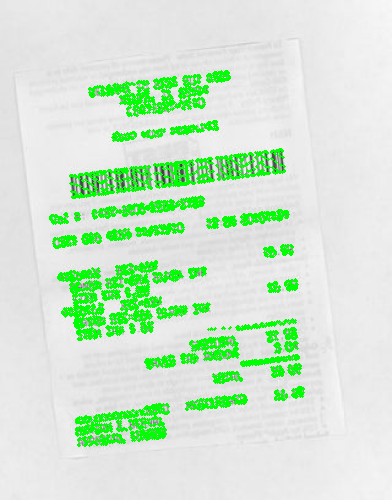

In [ ]:
cv2.drawContours(larr_doc_img_resized, [screenCnt], -1, (0, 255, 0), 2)
cv2_imshow(larr_doc_img_resized)
# cnts[0]